# **Abstract:** 
The objective of this notebook is to apply machine learning classification algorithms like Naive Bayes, Stochastic Gradient Descent and Support vector Machine on a term frequency inverse document frequency (tf-idf) sparse matrix to determine whether a user's opinion is positive or negative on Artificial Intelligence.

# PART-A: Determine a Proper Model

For this notebook, I have selected three supervised learning classification models which are Naive Baye, Stochastic Gradient Descent and Support Vector Machine to analyze the created data.

**Naive Bayes**

Naive Bayes is a probabilistic classification algorithm which uses Bayesian theory to calculate the probability of an event based on the prior probability of another related event. For example, let's say we want to calculate the probability of raining today given that there are clouds outside, then it can be done using the probability of rain, probability of cloudy weather and the probability of a cloudy day given that it had rain in the past. These sets of probability are mathematically denoted as prior probability, likelihood and marginalization using which we can calculate the posterior probability of an event. The reason for selecting this algorithm is that the dependency between two probabilities allows Naive Bayes to perform efficiently in text analysis problems.

**Stochastic Gradient Descent**

The aim of a Stochastic Gradient Descent (SGD) algorithm is to reduce the error rate by adjusting the values of weights of the features. This algorithm is an extension of hill climbing algorithm with the aim of finding a global minimum. The algorithm starts by randomly initializing the values of the weights and then calculating the error function. In the next iteration, the algorithm changes the values of weights by small margin called alpha or learning rate, If the error function has decreased, the algorithm keeps moving in that direction until it reaches either a local minimum or the global minimum. however, if the error function has increased after the change, the algorithm changes the values of weights in the opposite direction until it reaches a local minimum or the global minimum. This algorithm was selected because it is a simple and greedy algorithm which allows it to detect several patterns that might get undetected by other sophisticated algorithms.

**Support Vector Machine**

Support Vector Machine (SVM) is a classification algorithm that uses outlier analysis to identify the separation line between different classes in the dataset. Rather than calculating the similarities between two different datapoints, SVM tries to calculate the dissimilarity between those datapoints to differentiate them. This technique allows SVM to detect outliers in an efficient way. Furthermore, SVM uses a kernel that follows either linear, polynomial, sigmoid, gaussian or logarithmic pattern to calculate the separation line. These different sets of kernels make SVM an efficient tool to capture non-linear patterns in a higher-dimensional dataset. Since we have around 1531 dimensions in our dataset, SVM will be able to project those datapoints in a much better way than any other classification models.

# PART-B: Apply the Algorithm

Before applying the algorithm, we need to load the datasets created in the previous notebook. The datasets features and labels are stored in a csv file so they can be loaded using pandas' read_csv() method.

In [1]:
# Importing pandas package
import pandas as pd

# Loading both features and labels into two DataFrames
X = pd.read_csv('features.csv')
y = pd.read_csv('Labels.csv')

In [2]:
# Displaying first five rows of the features dataframe
X.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.491199,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0


In [3]:
# Displaying the size of the features dataframe
X.shape

(129, 1531)

In [4]:
# Displaying first five rows of the labels dataframe
y.head(5)

,Sentiments
0,0
1,0
2,0
3,0
4,0


In [5]:
# Displaying the size of the labels dataframe
y.shape

(129, 1)

After analyzing the shape and value of both the DataFrames, we can convert them into numpy arrays so that they can be applied to our classification models.

In [6]:
# Converting dataframes into numpy arrays
X = X.values
y = y.iloc[:, 0].values

In [7]:
print("Type of features:", type(X))
print("Size of features:", X.shape)
print("")
print("Type of labels:", type(y))
print("Size of labels:", y.shape)

Type of features: <class 'numpy.ndarray'>
Size of features: (129, 1531)

Type of labels: <class 'numpy.ndarray'>
Size of labels: (129,)


Now that we have our features and labels arrays, we can split them into training set and test set. This step is crucial as it will allow us to identify the accuracy of our classification models on unseen data. The splitting process can be executed using scikit-learn library as shown in the following code section, I have included 80% rows in the training set and the remaining 20% rows are added into the test set:

In [8]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [9]:
# Displaying the size of training set and test set
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (103, 1531)
Test set size: (26, 1531)


**Naive Bayes**

Now we can create our first model which is the Naive Bayes classification model. For this dataset I have used scikit-learn library's MultinomialNB class with 0.5 threshold value. This means that if the algorithm will calculate the probability of a comment being positive and negative, which ever label's probability is greater than 0.5 that label will be assigned to that particular document.

In [10]:
# Importing Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

# Creating an empty Naive Bayes object
naive_bayes = MultinomialNB(class_prior=[.5, .5])

# Training the model on training set
naive_bayes = naive_bayes.fit(X_train, y_train)

**Stochastic Gradient Descent**

To create the next model, I have used scikit-learn's linear model package. By using this package's SGDClassifier class, I have created an object with default parameters and trained the model on our training dataset.

In [11]:
# Importing Stochastic Gradient Descent model
from sklearn.linear_model import SGDClassifier

# Creating an empty Stochastic Gradient Descent object
sgd = SGDClassifier()

# Training the model on training set
sgd = sgd.fit(X_train, y_train)

**Support Vector Machine**

At last, I have created a support vector machine classifier with a gaussian kernel using scikit-learn's SVC class. Next, I have trained the gaussian SVM model on our training dataset.

In [12]:
# Importing Support Vector Machine Classifier model
from sklearn.svm import SVC

# Creating an empty Support Vector Machine object
svc = SVC(kernel='linear')

# Training the model on training set
svc = svc.fit(X_train, y_train)

# PART-C: Visualize and Explain Your Model

After creating all the models, we can visualize which features are being used to predict positive opinions and negative opinions. For that, first we will need to load the CountVectorizer object created in the previous notebook.

In [13]:
# Importing pickle module
import pickle

# Loading the saved vectorizer pickle file
cv = pickle.load(open("countvectorizer.pickel", "rb"))

Now, we can create method to calculate the features used for classifying positive opinions and negative opinions using the coefficient values of created classification models. In the following code section, I have created a method called important features that takes three arguments: number of features to be extracted, classifier object and the vectorizer object. Using these three parameters, the method calculates the coefficient values of the defined model and sorts them in a descending order to return the first n number of features

In [14]:
# Importing numpy package
import numpy as np

# Creating a method that returns the most important features for assigning labels
def important_features(n_features, classifier, vectorizer):
    feature_names = vectorizer.get_feature_names()
    coefs = sorted(zip(classifier.coef_[0], feature_names))
    top_features_0 = coefs[:n_features]
    top_features_1 = coefs[-n_features:][::-1]
    return np.array([top_features_0, top_features_1])

**Naive Bayes**

In [15]:
# Calling important features method to get the feature names and their coefficient values for Naive Bayes model
nb_top_features = important_features(20, naive_bayes, cv)

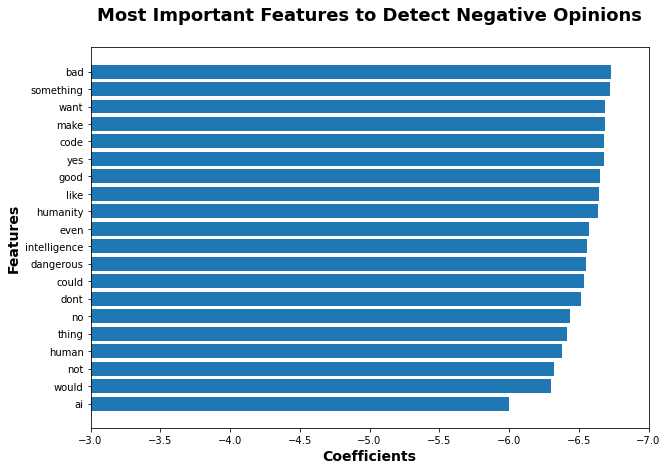

In [16]:
# Importing matplolib package for plotting
import matplotlib.pyplot as plt

# Plotting most important features for detecting Negative opinions
fig = plt.figure(figsize=(10,7))
plt.barh(nb_top_features[1][:, 1], nb_top_features[1][:, 0].astype(float))
plt.xlim(-3, -7)
plt.xlabel('Coefficients', weight='bold', fontsize=14)
plt.ylabel('Features', weight='bold', fontsize=14)
plt.title('Most Important Features to Detect Negative Opinions\n', weight='bold', fontsize=18)
plt.show()

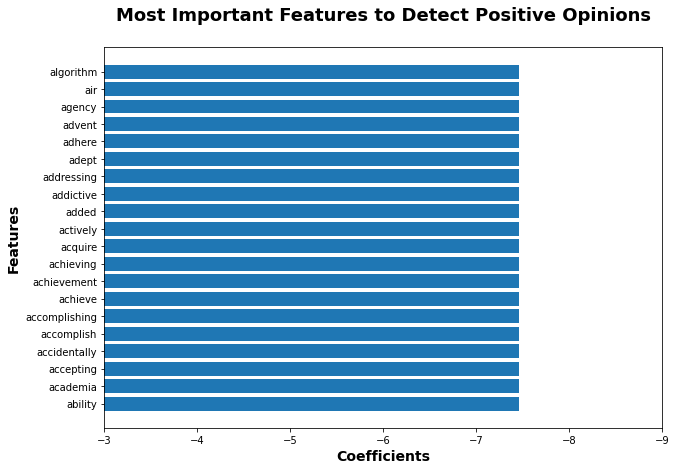

In [17]:
# Plotting most important features for detecting Positive opinions
fig = plt.figure(figsize=(10,7))
plt.barh(nb_top_features[0][:, 1], nb_top_features[0][:, 0].astype(float))
plt.xlim(-3, -9)
plt.xlabel('Coefficients', weight='bold', fontsize=14)
plt.ylabel('Features', weight='bold', fontsize=14)
plt.title('Most Important Features to Detect Positive Opinions\n', weight='bold', fontsize=18)
plt.show()

**Stochastic Gardient Descent**

In [18]:
# Calling important features method to get the feature names and their coefficient values for Stochastic Gradient Descent
sgd_top_features = important_features(20, sgd, cv)

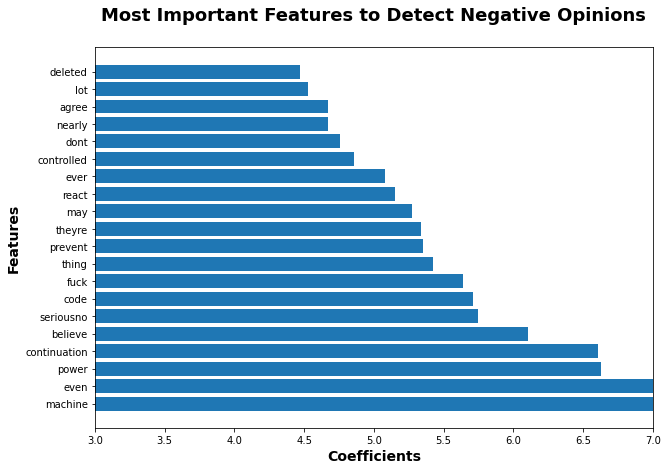

In [19]:
# Plotting most important features for detecting Negative opinions
fig = plt.figure(figsize=(10,7))
plt.barh(sgd_top_features[1][:, 1], sgd_top_features[1][:, 0].astype(float))
plt.xlim(3, 7)
plt.xlabel('Coefficients', weight='bold', fontsize=14)
plt.ylabel('Features', weight='bold', fontsize=14)
plt.title('Most Important Features to Detect Negative Opinions\n', weight='bold', fontsize=18)
plt.show()

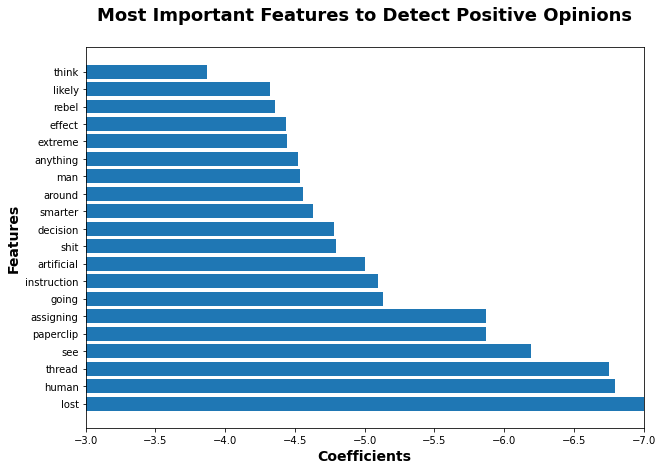

In [20]:
# Plotting most important features for detecting Positive opinions
fig = plt.figure(figsize=(10,7))
plt.barh(sgd_top_features[0][:, 1], sgd_top_features[0][:, 0].astype(float))
plt.xlim(-3, -7)
plt.xlabel('Coefficients', weight='bold', fontsize=14)
plt.ylabel('Features', weight='bold', fontsize=14)
plt.title('Most Important Features to Detect Positive Opinions\n', weight='bold', fontsize=18)
plt.show()

**Support Vector Machine**

In [21]:
# Calling important features method to get the feature names and their coefficient values for Support Vector Machine
svc_top_features = important_features(20, svc, cv)

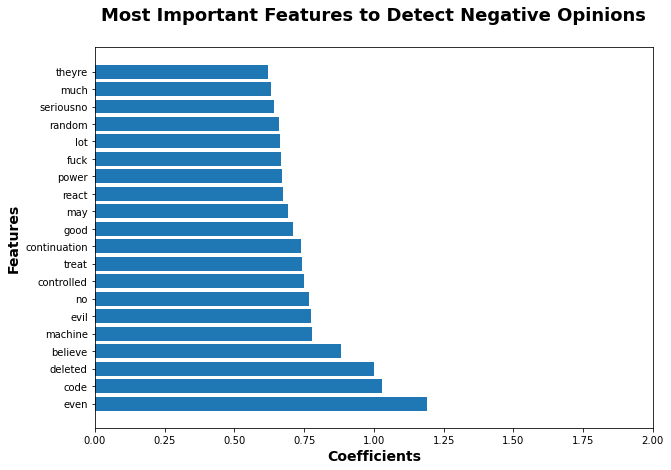

In [22]:
# Plotting most important features for detecting Negative opinions
fig = plt.figure(figsize=(10,7))
plt.barh(svc_top_features[1][:, 1], svc_top_features[1][:, 0].astype(float))
plt.xlim(0, 2)
plt.xlabel('Coefficients', weight='bold', fontsize=14)
plt.ylabel('Features', weight='bold', fontsize=14)
plt.title('Most Important Features to Detect Negative Opinions\n', weight='bold', fontsize=18)
plt.show()

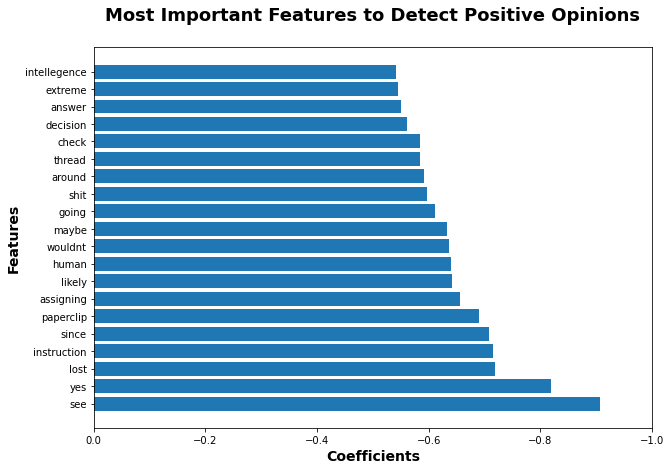

In [23]:
# Plotting most important features for detecting Positive opinions
fig = plt.figure(figsize=(10,7))
plt.barh(svc_top_features[0][:, 1], svc_top_features[0][:, 0].astype(float))
plt.xlim(0, -1)
plt.xlabel('Coefficients', weight='bold', fontsize=14)
plt.ylabel('Features', weight='bold', fontsize=14)
plt.title('Most Important Features to Detect Positive Opinions\n', weight='bold', fontsize=18)
plt.show()

From above six graphs, we can deduce six points:

1. Naive Bayes model uses words like **'bad', 'dangerous', 'yes'** to assign Negative label
2. Naive Bayes model uses words like **'algorithm', 'achieve', 'academia'** to assign Positive label
3. Stochastic Gradient Descent model uses words like **'bad', 'evil', 'treat'** to assign Negative label
4. Stochastic Gradient Descent model uses words like **'anything', 'smarter', 'intelligence'** to assign Positive label
5. Support Vector Machine model uses words like **'evil', 'machine', 'code'** to assign Negative label
6. Support Vector Machine model uses words like **'intelligence', 'humans', 'yes'** to assign Positive label

# PART-D: Discussion

After creating all the models, first we need to test all the models on seen dataset as well as unseen datasets to calculate their accuracy, precision, recall and F-1 score. Based on these evaluation measures, we will be able to correctly identify which model has produced the best results.

* Precision: The precision value defines the amount of total predicted positives
* Recall: Recall is defined as the fraction of True Positives actually predicted out of all the Positives
* F1 Score: F1 score defines the balance between the precision and recall of the model

**Naive Bayes**

In [24]:
# Testing the model on seen data
y_train_preds = naive_bayes.predict(X_train)

# Testing the model on unseen data
y_test_preds = naive_bayes.predict(X_test)

In [25]:
# Importing confusion matrix
from sklearn.metrics import confusion_matrix

# Displaying training confusion matrix
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_preds))
print("")

# Displaying test confusion matrix
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_preds))

Training Confusion Matrix:
[[55  0]
 [ 1 47]]

Testing Confusion Matrix:
[[10  4]
 [ 2 10]]


In [26]:
# Importing accuracy score
from sklearn.metrics import accuracy_score

# Displaying the accuracies of Naive Bayes models
print("Accuracy of Naive Bayes model on seen data is", accuracy_score(y_train, y_train_preds))
print("Accuracy of Naive Bayes model on unseen data is", accuracy_score(y_test, y_test_preds))

Accuracy of Naive Bayes model on seen data is 0.9902912621359223
Accuracy of Naive Bayes model on unseen data is 0.7692307692307693


In [27]:
# Other evaluation measures
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision of Naive Bayes model is", precision_score(y_test, y_test_preds, average = "macro"))
print("Recall of Naive Bayes model is", recall_score(y_test, y_test_preds, average = "macro"))
print("F1 score of Naive Bayes model is", f1_score(y_test, y_test_preds, average = "macro"))

Precision of Naive Bayes model is 0.7738095238095238
Recall of Naive Bayes model is 0.7738095238095238
F1 score of Naive Bayes model is 0.7692307692307692


**Stochastic Gradient Descent**

In [28]:
# Testing the model on seen data
y_train_preds = sgd.predict(X_train)

# Testing the model on unseen data
y_test_preds = sgd.predict(X_test)

In [29]:
# Displaying training confusion matrix
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_preds))
print("")

# Displaying test confusion matrix
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_preds))

Training Confusion Matrix:
[[55  0]
 [ 1 47]]

Testing Confusion Matrix:
[[10  4]
 [ 5  7]]


In [30]:
# Displaying the accuracies of Stochastic Gradient Descent models
print("Accuracy of Stochastic Gradient Descent model on seen data is", accuracy_score(y_train, y_train_preds))
print("Accuracy of Stochastic Gradient Descent model on unseen data is", accuracy_score(y_test, y_test_preds))

Accuracy of Stochastic Gradient Descent model on seen data is 0.9902912621359223
Accuracy of Stochastic Gradient Descent model on unseen data is 0.6538461538461539


In [31]:
# Other evaluation measures
print("Precision of Stochastic Gradient Descent model is", precision_score(y_test, y_test_preds, average = "macro"))
print("Recall of Stochastic Gradient Descent model is", recall_score(y_test, y_test_preds, average = "macro"))
print("F1 score of Stochastic Gradient Descent model is", f1_score(y_test, y_test_preds, average = "macro"))

Precision of Stochastic Gradient Descent model is 0.6515151515151515
Recall of Stochastic Gradient Descent model is 0.6488095238095238
F1 score of Stochastic Gradient Descent model is 0.6491754122938531


**Support Vector Machine**

In [32]:
# Testing the model on seen data
y_train_preds = svc.predict(X_train)

# Testing the model on unseen data
y_test_preds = svc.predict(X_test)

In [33]:
# Displaying training confusion matrix
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_preds))
print("")

# Displaying test confusion matrix
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_preds))

Training Confusion Matrix:
[[55  0]
 [ 2 46]]

Testing Confusion Matrix:
[[12  2]
 [ 5  7]]


In [34]:
# Displaying the accuracies of Support Vector Machine models
print("Accuracy of Support Vector Machine model on seen data is", accuracy_score(y_train, y_train_preds))
print("Accuracy of Support Vector Machine model on unseen data is", accuracy_score(y_test, y_test_preds))

Accuracy of Support Vector Machine model on seen data is 0.9805825242718447
Accuracy of Support Vector Machine model on unseen data is 0.7307692307692307


In [35]:
# Other evaluation measures
print("Precision of Support Vector Machine model is", precision_score(y_test, y_test_preds, average = "macro"))
print("Recall of Support Vector Machine model is", recall_score(y_test, y_test_preds, average = "macro"))
print("F1 score of Support Vector Machine model is", f1_score(y_test, y_test_preds, average = "macro"))

Precision of Support Vector Machine model is 0.7418300653594772
Recall of Support Vector Machine model is 0.7202380952380952
F1 score of Support Vector Machine model is 0.7204301075268817


By analyzing the results of all the models, we can say that the Naive Bayes model has performed better than other two classification models during the test phase (unseen data). Other models didn't choose better features to classify labels as compared to Naive Bayes. One limitation to note here is that, every classification model performed exceptionally well on training phase but they performed with an average accuracy on the testing phase. The reason behind this type of accuracy decrees might be due the way we have split the dataset. There are a total of 103 instances in the training set and only 26 instances in the test set. Which means that the problem can be solve by expanding the size of test set from 20% to around 30%.

# PART-E: Summary

In [36]:
print("Number of Positive Opinions:", np.count_nonzero(y == 1))
print("Number of Negative Opinions:", np.count_nonzero(y == 0))

Number of Positive Opinions: 60
Number of Negative Opinions: 69


In this notebook, we defined few classification techniques like Naive Bayes, Stochastic Gradient Descent and Support vector Machine. Then we used those algorithms to train a vectorizer sparse matrix containing people's opinions regarding Artificial Intelligence. After analyzing the features used by classification models and their accuracy values, we concluded that Naive Bayes model has outperformed other model by achieving accuracy of 77% with precision, recall and F1-score values above 0.75. However, we also noted that the accuracy of Naive Bayes model is higher in the training phase and significantly lower in the testing phase. This problem can be solved in two ways: first, we can change the split criterion from 20% data in test set to 30% data in the test set and second, we can gather more comments data from other social media accounts to increase the number of instances that we have. This way our model can be trained on large amount of dataset and it can produce significantly better results. At last, from this analysis, we concluded that there are more people speculating the advances in artificial intelligence than those people who are in favor of the field. This analysis suggests that AI experts should consider people's opinion and take precautions while developing such a system.